# Practical 9. Machine Learning Assignment.

--- 
Due date is March 21, before the class. 

Additional reading:
- [Documentation on sklearn PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html),
- [Useful visualization](http://setosa.io/ev/principal-component-analysis/), 
- [This tutorial](http://www.iro.umontreal.ca/~pift6080/H09/documents/papers/pca_tutorial.pdf) is extremely detailed and useful for understanding PCA.


Email me (Eugene) with the questions. We can arrange office hours: e.klyshko@mail.utoronto.ca


Partner: Mohamed Salama, utorid: salamam5

## Problem 1. Principal Components of handwriting 

Perform principal component analysis on the 1000 points of MNIST data set. Run the first cell to load the data in the variable `X`. `Y` contains the label of each handwritten digit, i.e. the number, or the class.

![](pics/mnist.png)

1. Plot the **total** variance vs the number of PCs used. **Hint**: variable `explained_variance_ratio_` may be useful. For the first PC, the variance is $V_1$, for the first two PCs: $V_1 + V_2$, for the first three, $V_1 + V_2 + V_3$, an so on... 
2. Use the first two component to represent MNIST data set in two dimensions on a scatter plot. 
3. Show the image of the first first principal eigenvector. **Hint**: variable `components_` and function `reshape()` might be useful.

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
X = x_test[:1000]
Y = y_test[:1000]
X = X.reshape(1000, 784)

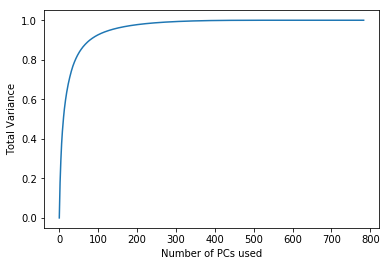

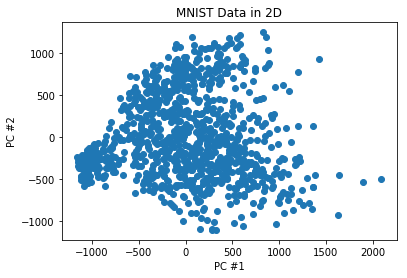

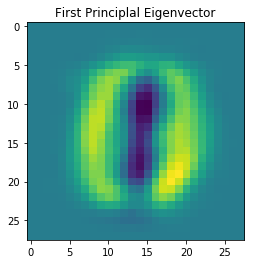

In [64]:
from sklearn.decomposition import PCA 

skl_PCA = PCA(n_components = 784).fit(X) ## fit the data to receive eigenvectors of covariance matrix


#initialize the variance array
total_variance = np.zeros(784)

#calculate the total variance using the first i components
for i in range(784):
    total_variance[i] = np.sum(skl_PCA.explained_variance_ratio_[:i])

# plotting
plt.plot(np.arange(784), total_variance)
plt.xlabel("Number of PCs used")
plt.ylabel("Total Variance")
plt.show()

# Transform the data
skl_X_transformed = skl_PCA.transform(X) ## apply a transformation

# Use the first two PCs to plot the data in 2D
plt.scatter(skl_X_transformed[:,0], skl_X_transformed[:,1])
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("MNIST Data in 2D")
plt.show()

# Show the image of the first principal eigenvector
plt.imshow(skl_PCA.components_[0].reshape(28,28))
plt.title("First Principlal Eigenvector")
plt.show()

## Problem 2. The Old World Map

Find the relative coordinates (sketch of the map) of the European cities knowing only pairwise distances between them. [Documentation on MDS](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html).
**Remember that MDS embedding may require rotation and/or horizontal and vertical flip.** You should get relative locations similar to these:
![](pics/europe.jpg)

In [53]:
import pandas as pd
# Pairwise distance between European cities

# Downloading the data set:
url = 'https://raw.githubusercontent.com/neurospin/pystatsml/master/datasets/eurodist.csv'
df = pd.read_csv(url)

# Exploring the downloaded data: printing only first 7x7 corner of the data frame.
print(df.iloc[:7, :7])
print()

## Create an array with cities' names:
city = np.array(df["city"])
print(city)

## Getting a full numpy squareform distance matrix from pandas dataframe:
D = np.array(df.iloc[:, 1:]) 
print(D.shape) # the shape of the distance matrix

         city  Athens  Barcelona  Brussels  Calais  Cherbourg  Cologne
0      Athens       0       3313      2963    3175       3339     2762
1   Barcelona    3313          0      1318    1326       1294     1498
2    Brussels    2963       1318         0     204        583      206
3      Calais    3175       1326       204       0        460      409
4   Cherbourg    3339       1294       583     460          0      785
5     Cologne    2762       1498       206     409        785        0
6  Copenhagen    3276       2218       966    1136       1545      760

['Athens' 'Barcelona' 'Brussels' 'Calais' 'Cherbourg' 'Cologne'
 'Copenhagen' 'Geneva' 'Gibraltar' 'Hamburg' 'Hook of Holland' 'Lisbon'
 'Lyons' 'Madrid' 'Marseilles' 'Milan' 'Munich' 'Paris' 'Rome' 'Stockholm'
 'Vienna']
(21, 21)


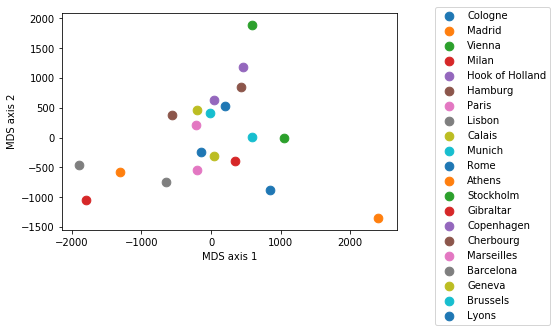

In [56]:
from sklearn.manifold import MDS
mds_2D = MDS(n_components=2, dissimilarity='precomputed', n_jobs=-1,random_state =2).fit_transform(D)
# Random_state = 2 ensures that transformed data has the same rotation everytime because it uses the same seed for the random number generation
# This gave us the right rotation by coincidence

fig, ax = plt.subplots()
for label in set(city):
    mask = city==label
    ax.scatter(mds_2D[:,0][mask], mds_2D[:,1][mask], marker = '.', label = label,s=300)
    
# Puts the legend outside of the plot from: https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot



plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel('MDS axis 1')
plt.ylabel('MDS axis 2')

plt.show()

## Problem 3. Machine Learning analysis of the MD simulation.

$C_{\alpha}$ atom is the carbon atom of the aminoacid which connect aminoacid side chain to the backbone. The protein with $N$ aminoacids contains exatly $N$ $C_{\alpha}$ atoms. You can select them from the trajectory using `select_atoms('name CA')` function in `MDAnalysis` module:

```python
import MDAnalysis as md
sys = md.Universe(PDB_FILE, DCD_FILE)
CA_atoms = sys.select_atoms('name CA')
```

Let’s suppose you have a trajectory of a protein with $N$ $C_{\alpha}$ atoms and $M$ frames. The feature vector with pairwise distances between all possible pairs of $C_{\alpha}$ will have $N(N-1)/2$ components (features, dimensions) for only one frame. Thus, your full dataset `X` will have $M \times N(N-1)/2$ shape.

In the practical 7, you ran an MD simulation of `polyGLY` in 300 K environment. Use the `*.pdb` file and `*.dcd` file with the 300 K trajectory as your input.

1. Generate a dataset `X` in which you will look at the vectors of all pairwise distances between $C_{\alpha}$ atoms for each time frame. 

2. Perform PCA of the dataset `X`. Determine the number of PCs that correspond to > 90% of the total variance. 

3. Scatter plot the data set `X` using only first 2 PCs. Do you see any regularities, e.g. dense regions of the plot? If yes, think about which part of the trajectory (beginning or end) they correspond to. Check your hypothesis. Explain your results.

The number of principal components neded to ave variance > 90% is 1


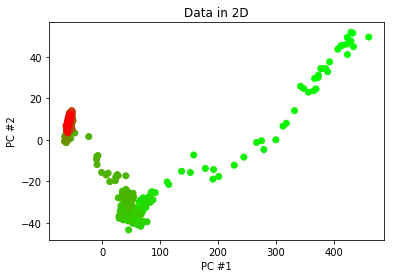

In [78]:
import MDAnalysis as md
import numpy as np


pdb_file = 'data/polyGLY.pdb'
dcd_file = 'polyGLY_traj_300K.dcd'  
sys = md.Universe(pdb_file, dcd_file)

CA_atoms = sys.select_atoms('name CA')

# Number of Ca atoms
N = len(CA_atoms)
M = len(sys.trajectory)

#Calculate pairwise distances
'''
from scipy.spatial.distance import pdist
X = []
for frame in sys.trajectory:
    X.append(pdist(CA_atoms.positions))
X = np.array(X)
'''

## More intuitive way to do that:
X = np.empty((M, int(N * (N - 1) / 2)))

# using counter
k = 0 

# for each frame of the trajectory
for frame in sys.trajectory:
    x = []
    # double loop for every pair i,j of atoms avoiding the duplicates
    for i in range(len(CA_atoms)):
        for j in range(len(CA_atoms)):
            if j > i :
                # find distance of the vector connecting two atoms
                d = np.linalg.norm(CA_atoms[i].position - CA_atoms[j].position)
                x.append(d)
    # making an numpy array and add that to the X
    x = np.array(x)
    X[k] = x
    k += 1 

# Checking the dimensionality
print(X.shape, (M, int(N * (N - 1) / 2)))
    
from sklearn.decomposition import PCA 

# Total number of components (N*(N-1)/2)
total_num_components = int(N * (N - 1) / 2)
skl_PCA = PCA(n_components = total_num_components).fit(X)



# number of components needed to have grater than 90% variance
num_components = 0

#calculate the total variance using the first i components
for i in range(total_num_components):
    total_variance = np.sum(skl_PCA.explained_variance_ratio_[:i])
    if total_variance > 0.90:
        num_components = i
        break


print("The number of principal components neded to ave variance > 90% is", num_components)


# Transform the data
skl_X_transformed = skl_PCA.transform(X) ## apply a transformation

colors = np.array([np.linspace(0,1,len(skl_X_transformed)), np.linspace(1, 0,len(skl_X_transformed)), np.zeros(len(skl_X_transformed))])
# Use the first two PCs to plot the data in 2D
plt.scatter(skl_X_transformed[:,0], skl_X_transformed[:,1], c=colors.T)
plt.xlabel("PC #1")
plt.ylabel("PC #2")
plt.title("Data in 2D")
plt.show()



The principal components are the 300 different pairwise distances of the CA atoms.
The first principal component is probably the end to end distance (ie. the distance between the two furthest CA atoms) because atoms that are close together when unfolded will not get that much closer together when the protein folds. However, atoms that are further apart will get much closer together once the protein folds.

The dense regions in the plot correspond to later parts of the trajectory when the protein has folded/partially folded. This can be seen in the plot above, where earlier points are in green, and as time goes on, the color of the points shifts to red. Furthermore, looking at the figure for the speed of folding at 300K from practical 7, you can see that the protein quickly folded to an intermediate state, remained there for some time, and then quickly folded to its most folded state and remained there. This corresponds with the analysis of the figure above.
